# ИУ5-63Б, Шамаилов Максим

# Рубежный Контроль №2

## 23 вариант

**Задание**: Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

**Методы для ИУ5-63Б.** Метод №1: "Дерево решений". Метод №2: "Случайный лес".

**Набор данных:** https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

### Импорт библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("world-happiness-report-2021.csv")
data.shape

(149, 20)

In [3]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
data.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [5]:
data.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [6]:
data['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

## Масштабирование данных

In [7]:
from sklearn.preprocessing import MinMaxScaler

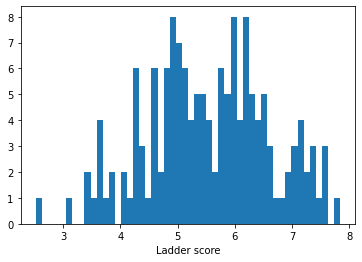

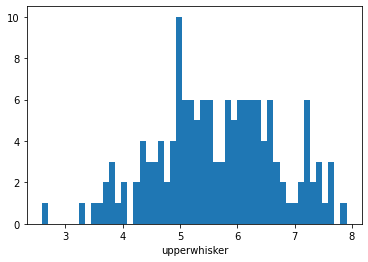

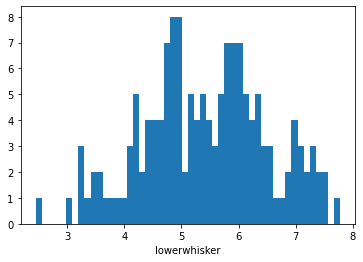

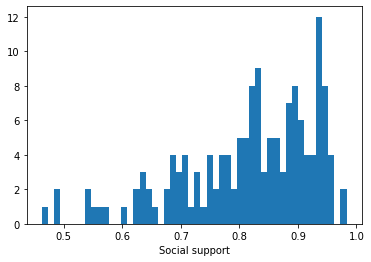

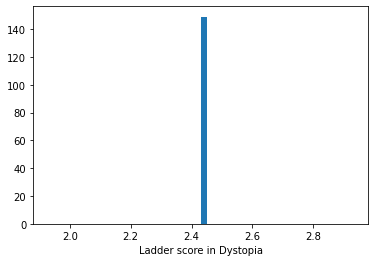

In [8]:
num_col = ['Ladder score', 'upperwhisker', 'lowerwhisker', 'Social support', 'Ladder score in Dystopia']
for col in data[num_col]:
    plt.hist(data[col],50)
    plt.xlabel(col)
    plt.show()

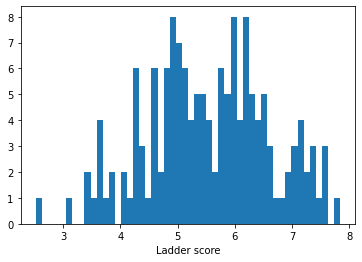

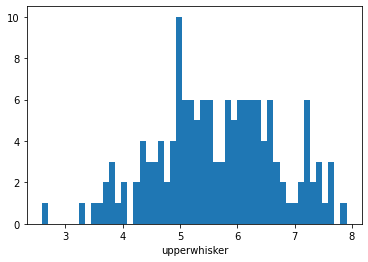

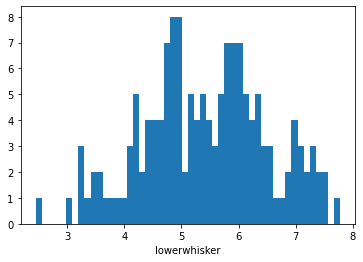

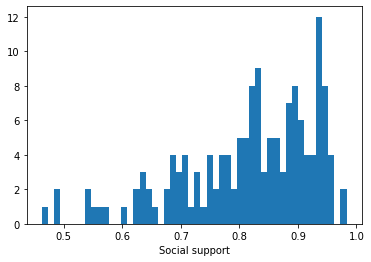

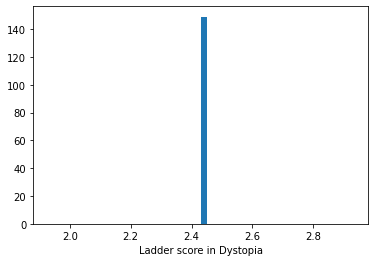

In [9]:
# MinMax - масштабирование
num_col = ['Ladder score', 'upperwhisker', 'lowerwhisker', 'Social support', 'Ladder score in Dystopia']
for col in data[num_col]:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

## Кодирование категориальных признаков

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
data.loc[:, 'Ladder score'] = le.fit_transform(data['Ladder score'])
data['Ladder score'].head()

0    146
1    145
2    144
3    143
4    142
Name: Ladder score, dtype: int64

In [12]:
cat_cols = ['Standard error of ladder score', 'lowerwhisker', 'Ladder score in Dystopia', 'Country name', 'Regional indicator']
one_hot = pd.get_dummies(data[cat_cols].astype(str))
one_hot.head()

,Standard error of ladder score_0.026000000000000002,Standard error of ladder score_0.027000000000000003,Standard error of ladder score_0.028999999999999998,Standard error of ladder score_0.032,Standard error of ladder score_0.033,Standard error of ladder score_0.034,Standard error of ladder score_0.035,Standard error of ladder score_0.036000000000000004,Standard error of ladder score_0.037000000000000005,Standard error of ladder score_0.038,...,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# Замена бинарными значениями
data = data.join(one_hot)
data.drop(columns=cat_cols, inplace=True)

In [14]:
data.head()

,Ladder score,upperwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,...,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
0,146,7.904,10.775,0.954,72.0,0.949,-0.098,0.186,1.446,1.106,...,0,0,0,0,0,0,0,0,0,1
1,145,7.687,10.933,0.954,72.7,0.946,0.030,0.179,1.502,1.108,...,0,0,0,0,0,0,0,0,0,1
2,144,7.643,11.117,0.942,74.4,0.919,0.025,0.292,1.566,1.079,...,0,0,0,0,0,0,0,0,0,1
3,143,7.670,10.878,0.983,73.0,0.955,0.160,0.673,1.482,1.172,...,0,0,0,0,0,0,0,0,0,1
4,142,7.518,10.932,0.942,72.4,0.913,0.175,0.338,1.501,1.079,...,0,0,0,0,0,0,0,0,0,1


## Модели

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
data_train, data_test, data_y_train, data_y_test = train_test_split(data[data.columns.drop('Explained by: Log GDP per capita')], data['Explained by: Log GDP per capita'], random_state=1)

### Дерево решений 

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dtc = DecisionTreeRegressor(random_state=1).fit(data_train, data_y_train)
data_test_predicted_dtc = dtc.predict(data_test)

### Случайный лес

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
RF = RandomForestRegressor(random_state=1).fit(data_train, data_y_train)
data_test_predicted_rf = RF.predict(data_test)

## Оценка качества:

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
print('Метрика MSE:\nДерево решений: {}\nСлучайный лес: {}'.format(mean_squared_error(data_y_test, data_test_predicted_dtc), mean_squared_error(data_y_test, data_test_predicted_rf)))

Метрика MSE:
Дерево решений: 0.005497526315789476
Случайный лес: 0.0008044197394736656


In [23]:
# 4) Метрика R2 или коэффициент детерминации
print('Метрика R\u00B2:\nДерево решений: {}\nСлучайный лес: {}'.format(r2_score(data_y_test, data_test_predicted_dtc), r2_score(data_y_test, data_test_predicted_rf)))

Метрика R²:
Дерево решений: 0.9623226981743431
Случайный лес: 0.9944869085516487


## Выводы о качестве построенных моделей:

Исходя из оценки качества построенных моделей можно увидеть, что модель "Случайный лес" лучше справляется с задачей по сравнению с моделью "Дерево решений", что может свидетельствовать о переобучении модели "Дерево решений".